# IM/DD Models and Datasets

In the following we show the data generated by the IM/DD links used in the `LCDDataset` and the `SSMFDataset`.


## LCD-Task

In [4]:
import matplotlib.pyplot as plt
import numpy as np

from IMDD import IMDDModel, LCDParams, helpers

link = IMDDModel(LCDParams)

print("Link parameters: ", LCDParams)
print("Link: ", link)

Link parameters:  IMDDParams(N=10000, n_taps=7, alphabet=tensor([-3., -1.,  1.,  3.]), oversampling_factor=3, baudrate=112, wavelength=1270, dispersion_parameter=-5, fiber_length=4, noise_power_db=-20.0, roll_off=0.2, bias=2.25)
Link:  IMDDModel(
  IMDDParams(N=10000, n_taps=7, alphabet=tensor([-3., -1.,  1.,  3.]), oversampling_factor=3, baudrate=112, wavelength=1270, dispersion_parameter=-5, fiber_length=4, noise_power_db=-20.0, roll_off=0.2, bias=2.25)
  (transmitter): Transmitter()
  (channel): OpticalChannel()
  (receiver): Receiver()
)


In [5]:
# Create indices in X to send
qs = link.source()
print("Messages:\n", qs, qs.shape)

# Each of those indices correspond to a pair of bits
gray_labels = helpers.get_graylabel(2)
print("Gray bits:\n", gray_labels)

# bits that get sent
bits = gray_labels[qs]
print("Bits to send:\n", bits, bits.shape)

Messages:
 tensor([3, 2, 0,  ..., 0, 1, 0]) torch.Size([10000])
Gray bits:
 [[0 0]
 [0 1]
 [1 1]
 [1 0]]
Bits to send:
 [[1 0]
 [1 1]
 [0 0]
 ...
 [0 0]
 [0 1]
 [0 0]] (10000, 2)


In [6]:
# Now we sent the symbols corresponding to the indices and get received symbols
# at the receiver side in shape (N, n_taps) with y[k] at (k, n_taps//2)
y_chunks = link(qs)
print("Received chunked symbols:\n", y_chunks, y_chunks.shape)

Received chunked symbols:
 tensor([[1.0160, 0.8042, 3.5910,  ..., 1.0169, 2.0352, 1.0150],
        [0.7459, 1.0160, 0.8042,  ..., 5.1194, 1.0169, 2.0352],
        [0.9554, 0.7459, 1.0160,  ..., 3.5910, 5.1194, 1.0169],
        ...,
        [5.1194, 1.0169, 2.0352,  ..., 1.4731, 1.2137, 1.7261],
        [3.5910, 5.1194, 1.0169,  ..., 1.0150, 1.4731, 1.2137],
        [0.8042, 3.5910, 5.1194,  ..., 2.0352, 1.0150, 1.4731]]) torch.Size([10000, 7])


/tmp/ipykernel_5610/2608589793.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0, 0].set_yticklabels(["00", "01", "11", "10"])
/tmp/ipykernel_5610/2608589793.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0, 1].set_xticklabels(["00", "01", "11", "10"])


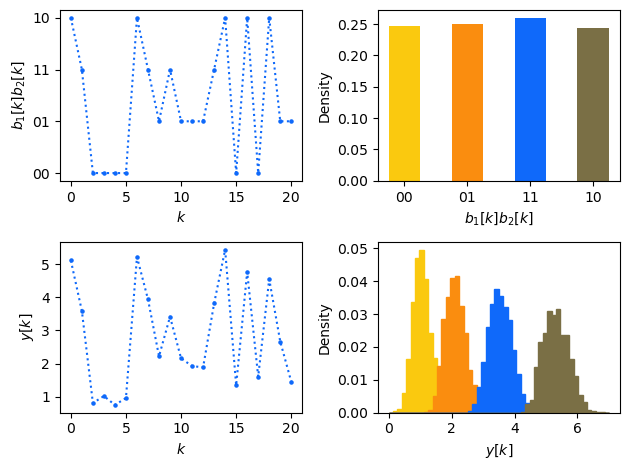

In [7]:
def plot_data(indices, samples, params):
    color = ["#FAC90F", "#FA8D0F", "#0F69FA", "#7A6F45"]

    fig, axs = plt.subplots(nrows=2, ncols=2)

    axs[0, 0].scatter(np.arange(0, 21), indices[:21].numpy(), color=color[2], s=5)
    axs[0, 0].plot(np.arange(0, 21), indices[:21].numpy(), ls=":", color=color[2])
    axs[0, 0].set_ylabel("$b_1[k]b_2[k]$")
    axs[0, 0].set_xlabel("$k$")
    axs[0, 0].set_yticklabels(["00", "01", "11", "10"])
    axs[0, 0].set_yticks([0, 1, 2, 3])

    axs[0, 1].set_ylabel("Density")
    axs[0, 1].set_xlabel("$b_1[k]b_2[k]$")
    for i in range(4):
        labels, counts = np.unique(indices[indices == i].numpy(), return_counts=True)
        axs[0, 1].bar(labels, counts / params.N, align='center', width=0.5, color=color[i])
    axs[0, 1].set_xticklabels(["00", "01", "11", "10"])
    axs[0, 1].set_xticks([0, 1, 2, 3])

    axs[1, 0].scatter(np.arange(21), samples[:21, params.n_taps//2], color=color[2], s=5)
    axs[1, 0].plot(samples[:21, params.n_taps//2], ":", color=color[2])
    axs[1, 0].set_ylabel(r"$y[k]$")
    axs[1, 0].set_xlabel("$k$")

    for i in range(4):
        (counts, bins) = np.histogram(
            samples[:, params.n_taps//2].numpy()[indices == i],
            bins=np.linspace(0, 7, 51))
        axs[1, 1].hist(
            bins[:-1], bins, weights=counts / params.N, linewidth=1, alpha=1,
            histtype="stepfilled", edgecolor=color[i], color=color[i])
    axs[1, 1].set_ylabel("Density")
    axs[1, 1].set_xlabel(r"$y[k]$")

    plt.tight_layout()
    plt.show()

plot_data(qs, y_chunks, LCDParams)

## SSMF-Task

/tmp/ipykernel_5610/2608589793.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0, 0].set_yticklabels(["00", "01", "11", "10"])
/tmp/ipykernel_5610/2608589793.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0, 1].set_xticklabels(["00", "01", "11", "10"])


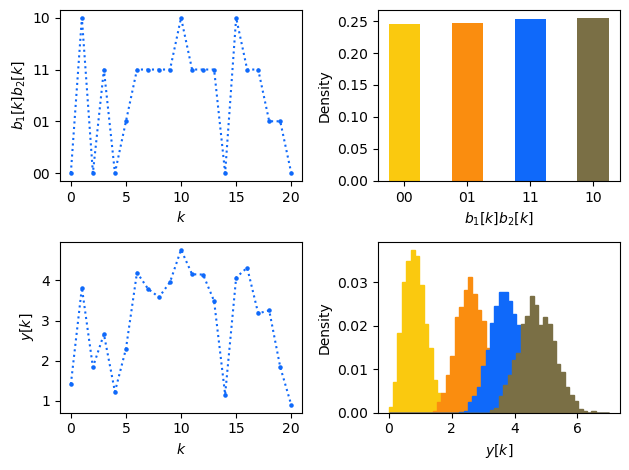

Link parameters:  IMDDParams(N=10000, n_taps=7, alphabet=tensor([-3., -1.,  1.,  3.]), oversampling_factor=3, baudrate=112, wavelength=1270, dispersion_parameter=-5, fiber_length=4, noise_power_db=-20.0, roll_off=0.2, bias=2.25)
Link:  IMDDModel(
  IMDDParams(N=10000, n_taps=21, alphabet=tensor([0.0000, 1.0000, 1.4142, 1.7321], dtype=torch.float64), oversampling_factor=3, baudrate=50, wavelength=1550, dispersion_parameter=-17, fiber_length=5, noise_power_db=-20.0, roll_off=0.2, bias=0.25)
  (transmitter): Transmitter()
  (channel): OpticalChannel()
  (receiver): Receiver()
)


In [8]:
from IMDD import SSMFParams

link = IMDDModel(SSMFParams)
qs = link.source()
y_chunks = link(qs)

plot_data(qs, y_chunks, SSMFParams)

print("Link parameters: ", LCDParams)
print("Link: ", link)

# Dataset usage


In [9]:
from IMDD import LCDDataset

# Dataset
lcd_dataset = LCDDataset()
print("Dataset size: ", len(lcd_dataset))

y_chunk, q = lcd_dataset[42]
print("y_chunk:\n", y_chunk, y_chunk.shape)
print("q:\n", q, q.shape)
print("bits b_1 and b_2 corresponding to q:\n", gray_labels[q])
print("Symbol x corresponding to q:\n", LCDParams.alphabet[q])

# We can change the number of taps
lcd_dataset = LCDDataset()
lcd_dataset.set_n_taps(5)
y_chunk, q = lcd_dataset[42]
print("y_chunk:\n", y_chunk, y_chunk.shape)

Dataset size:  10000
y_chunk:
 tensor([1.7087, 2.8999, 3.9805, 5.3214, 3.9909, 3.3148, 1.0065]) torch.Size([7])
q:
 tensor(3) torch.Size([])
bits b_1 and b_2 corresponding to q:
 [1 0]
Symbol x corresponding to q:
 tensor(3.)
y_chunk:
 tensor([2.1918, 5.3602, 3.8188, 2.1461, 0.8782]) torch.Size([5])


In [10]:
from torch.utils.data import DataLoader

lcd_dataset = LCDDataset()
dataloader = DataLoader(lcd_dataset, batch_size=32, shuffle=True)

y_chunk_batch, q_batch = next(iter(dataloader))
print("y_chunk_batch:\n", y_chunk_batch, y_chunk_batch.shape)
print("q:\n", q_batch, q_batch.shape)

y_chunk_batch:
 tensor([[1.7717, 1.8654, 1.0416, 3.0982, 2.6135],
        [1.1914, 2.7980, 1.3451, 2.7903, 1.0386],
        [0.7884, 0.8057, 1.6293, 5.5517, 3.9138],
        [3.8404, 5.1223, 6.0828, 4.9967, 4.0994],
        [3.7358, 2.1273, 5.6182, 5.4540, 1.9623],
        [2.9436, 1.1621, 3.6135, 5.2507, 0.9416],
        [2.3616, 4.8743, 0.7794, 2.1738, 5.4721],
        [2.3056, 3.6331, 3.5464, 0.8248, 0.6607],
        [1.1436, 0.8731, 1.8744, 2.1706, 2.0365],
        [1.1354, 3.1134, 2.3980, 3.5053, 5.8454],
        [1.2793, 0.7649, 1.9692, 0.8590, 3.7264],
        [5.4409, 0.7642, 3.8676, 5.3120, 4.0442],
        [4.1951, 5.3012, 0.9382, 2.1966, 3.2430],
        [1.1140, 5.0535, 2.2094, 0.5204, 1.9679],
        [2.3900, 3.3680, 0.7159, 1.9476, 3.4809],
        [1.2332, 4.9604, 1.3278, 0.5504, 1.0064],
        [5.1371, 0.9455, 3.7485, 5.6968, 0.8059],
        [4.6861, 1.6563, 1.2539, 5.0471, 2.4098],
        [5.5759, 3.6783, 0.6900, 2.4340, 5.0986],
        [2.0713, 2.9704, 0.9004, 0